In [8]:
import matplotlib.pyplot as plt
import ase
from ase import io
from ase.visualize import view
import numpy as np

In [9]:

"""
Generate ZOrder Curve
"""
# from pyzorder import ZOrderIndexer
# import numpy as np

# zi = ZOrderIndexer((0, 60), (0, 60))

# z_2_2 = zi.zindex(2, 2)
# # z_2_2 = 12

# zi.next_zorder_index(z_2_2)
# # return 13

# zi.next_zorder_index(15)

# order = []
# order_2d = []
# order_dih = []
# dih1, dih2 = (np.arange(0, 355.0, 6) + 165), (np.arange(0, 355.0, 6) - 162)

# for i in range(60):
#     for j in range(60):
#         #print(
#             #i, j, ":", zi.zindex(i, j)
#         #)  # , "--" , zi.next_zorder_index(i), zi.next_zorder_index(j))
#         order_dih.append([dih1[i], dih2[j]])
#         order_2d.append([i, j])
#         #print(zi.zindex(i,j))
#         order.append(zi.zindex(i, j))
# ordered_order_dih = [_[0] for _ in sorted(zip(order_dih, order), key=lambda x: x[1])]
# ordered_order_dih = np.array(ordered_order_dih)

# for i in range(len(order)):
#     print(order[i])

'\nGenerate ZOrder Curve\n'

In [10]:
"""
generate one xyz file from all xyz files. New file is easier to open in vmd
"""

# from pathlib import Path

# with open(
#     f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/test_orca_xyz_output_ordered.xyz",
#     "a",
    
# ) as t:
#     for i in range(3600):
#         with open(
#             f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/orca/dih2dscan-{i}.inp.xyz/pbe0/def2svp/dih_scani.xyz",
#             "r",
#         ) as f:
#             t.write(f.read())

'\ngenerate one xyz file from all xyz files. New file is easier to open in vmd\n'

In [290]:


gnorms, energies = [], []
all_atoms = []
phis, psis = [], []
names = []

for i in range(3600):
    fn = f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/orca/dih2dscan-{i}.inp.xyz/pbe0/def2svp/dih_scani.xyz"
    
    names.append(i)
    
    with open(
        fn,
        "r"
    ) as f:
        _, _, _, _, _, energy = f.read().split("\n")[1].split()
        energies.append(float(energy))

    atoms = io.read(fn)
    
    phi, psi = (
        atoms.get_dihedral(31, 17, 14, 12, mic=False), # % 180 - 180,
        atoms.get_dihedral(17, 14, 12, 7, mic=False), # % 180 - 180,
    )

    if 0 < phi < 180:
        pass
    else:
        phi = phi - 360

    if 0 < psi < 180:
        pass
    else:
        psi = psi - 360
    
    all_atoms.append(atoms)
    phis.append(phi)
    psis.append(psi)

#gnorms = np.array(gnorms)
# _ = plt.hist(gnorms, bins=100)

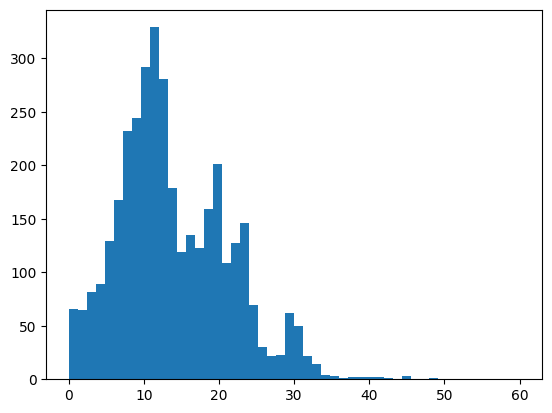

In [291]:
energies = np.array(energies)

energies_min_shift = energies - min(energies)

_ = plt.hist(energies_min_shift * 627, bins=50, range=(0, 60))
plt.show()

In [292]:
import polars as pl
VMAX = 20
df = pl.DataFrame({"name": names, "energies_min_shift": energies_min_shift * 627, "psi": psis, "phi": phis})
                   # (np.array(phis) - 360) % 360, 
                   
                   # (np.array(psis) - 360) % 360}
                 # )
df = df.filter(pl.col("energies_min_shift") < 20)
df = df.with_columns((pl.col("energies_min_shift").map_elements(lambda x: x if x < VMAX else VMAX)).alias("e_plot"))

/tmp/ipykernel_2012975/2168283534.py:9: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns((pl.col("energies_min_shift").map_elements(lambda x: x if x < VMAX else VMAX)).alias("e_plot"))


In [293]:
df

name,energies_min_shift,psi,phi,e_plot
i64,f64,f64,f64,f64
0,0.141633,-162.087364,169.225093,0.141633
1,0.0,-156.579623,164.560364,0.0
2,0.081081,-156.322849,169.225098,0.081081
3,0.347081,-161.604535,174.103109,0.347081
4,0.687273,-161.825699,178.794462,0.687273
…,…,…,…,…
3595,0.88524,-171.487328,155.228803,0.88524
3596,0.622524,-171.285118,160.116594,0.622524
3597,0.540784,-166.387022,155.227463,0.540784


In [294]:
df.describe()

statistic,name,energies_min_shift,psi,phi,e_plot
str,f64,f64,f64,f64,f64
"""count""",2845.0,2845.0,2845.0,2845.0,2845.0
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",1710.926889,11.039093,-15.519963,7.75431,11.039093
"""std""",1086.115951,4.826496,108.101346,112.015678,4.826496
"""min""",0.0,0.0,-179.854878,-179.980477,0.0
"""25%""",736.0,7.865054,-106.61336,-104.212416,7.865054
"""50%""",1579.0,10.993647,-39.956644,20.807386,10.993647
"""75%""",2605.0,14.229689,85.870917,108.946492,14.229689
"""max""",3599.0,19.97862,178.916943,179.765629,19.97862


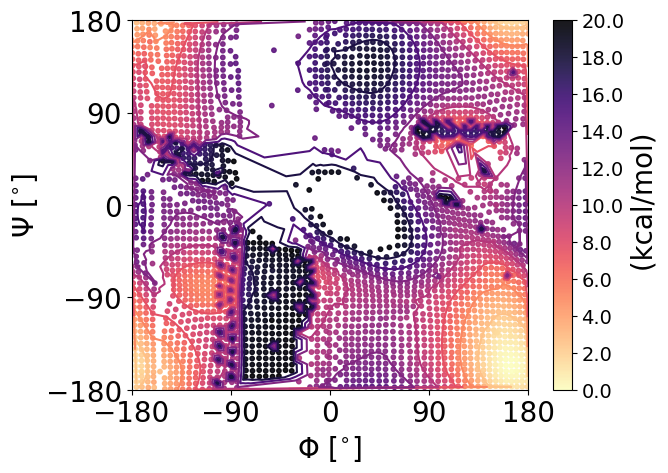

In [295]:
# s = plt.scatter((df["phi"] % 360) - 180 , (df["psi"] % 360) - 180, c=df["energies_min_shift"], vmin=0, vmax=VMAX, cmap=cm.coolwarm_r)
# plt.colorbar(s)

cm = ""

plt.tricontour((df["phi"]) , (df["psi"] ), df["e_plot"] ,
                   # levels=[0, 1, 2, 3, 4, 6],
               # vmin=0, vmax=15, 
                cmap="magma_r")

s = plt.scatter((df["phi"] ) , (df["psi"]), c=df["e_plot"], 
                vmin=0, vmax=VMAX, 
                # vmin=0, vmax=15, 
                s=10, alpha=0.9,
                cmap="magma_r")

plt.xlabel("$\Phi$ [$^{\circ}$]", fontsize=20)
plt.ylabel("$\Psi$ [$^{\circ}$]", fontsize=20)
plt.xticks(np.arange(-180, 181, 90), fontsize=20)
plt.yticks(np.arange(-180, 181, 90), fontsize=20)
cbar = plt.colorbar(s)
cbar.set_label(" (kcal/mol)", fontsize=20)
cbar.set_ticks(np.arange(0, 21, 2 ))
cbar.set_ticklabels(["{:.1f}".format(_) for _ in np.arange(0, 21, 2)], fontsize=14)

plt.savefig("RamPlotColoredByNRGBase.png", bbox_inches = "tight")

In [296]:
x = df["phi"]
y = df["psi"]
z = df["e_plot"]

x, y, z = x.to_numpy().copy(), y.to_numpy().copy(), z.to_numpy().copy() 

In [297]:
df["e_plot"].describe()

statistic,value
str,f64
"""count""",2845.0
"""null_count""",0.0
"""mean""",11.039093
"""std""",4.826496
"""min""",0.0
"""25%""",7.865054
"""50%""",10.993647
"""75%""",14.229689
"""max""",19.97862


In [298]:
values.max()

np.float64(9.984290525419624)

/tmp/ipykernel_2012975/1537030224.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(np.arange(0, 11, 2), fontsize=14)


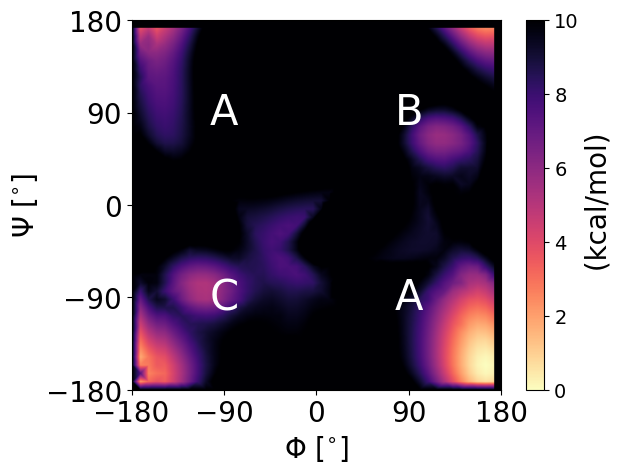

In [300]:
import polars as pl
VMAX = 10
SPACING = 8
SPACING2 = 0.4

def shift_angle(x):
    return x #(x % 360) - 180

df = pl.DataFrame({"e_plot": z, "psi": shift_angle(x), "phi": shift_angle(y)})
df = df.filter(pl.col("e_plot") < VMAX)
# df = df.with_columns((pl.col("energies_min_shift").map_elements(lambda x: x if x < VMAX else VMAX*1.5)).alias("e_plot"))

points = df[["phi", "psi"]].to_numpy()
values = df[["e_plot"]].to_numpy()

# points = shift_angle(points - 90)

from scipy.interpolate import griddata

grid_x, grid_y = np.mgrid[-180:180:SPACING, -180:180:SPACING]

# grid_x, grid_y = np.mgrid[-360:0:1, -360:0:1]

grid_z0 = griddata(points, values, (grid_x, grid_y), method='cubic', rescale=True, fill_value=VMAX)

new_points = np.array([[a, b] for a, b in zip(grid_x.flatten(), grid_y.flatten())])
new_values = grid_z0.flatten()

grid_x, grid_y = np.mgrid[-180:180:SPACING2, -180:180:SPACING2]

# grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear', rescale=True, fill_value=VMAX)
grid_z1 = griddata(new_points, new_values, (grid_x, grid_y), method='linear', rescale=True, fill_value=VMAX)

grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic', rescale=True, fill_value=VMAX)

ax = plt.gca()

s = ax.imshow(grid_z1,  cmap='magma_r', 
           origin='lower', 
           # interpolation=None,
              # interpolation="spline36",
           extent=(-180, 180, -180, 180),
           vmin=0, vmax=VMAX
          )
XX = 90
YY = 90
plt.text(XX, -YY, "A", fontsize=30, color="white", va="center", ha="center")
plt.text(-XX, -YY, "C", fontsize=30, color="white", va="center", ha="center")
plt.text(-XX, YY, "A", fontsize=30, color="white", va="center", ha="center")
plt.text(XX, YY, "B", fontsize=30, color="white", va="center", ha="center")


plt.xlabel("$\Phi$ [$^{\circ}$]", fontsize=20)
plt.ylabel("$\Psi$ [$^{\circ}$]", fontsize=20)

plt.xticks(np.arange(-180, 181, 90), fontsize=20)
plt.yticks(np.arange(-180, 181, 90), fontsize=20)
cbar = plt.colorbar(s)
cbar.set_label(" (kcal/mol)", fontsize=20)
cbar.set_ticklabels(np.arange(0, 11, 2), fontsize=14)
plt.savefig("RamplotColoredByNRGCleaned.png", bbox_inches = "tight")

In [274]:
grid_z1.flatten()

array([10.        , 10.1028164 ,  9.86606754, ..., 10.        ,
       10.        , 10.        ], shape=(5184,))

In [20]:
new_points = np.array([[a, b] for a, b in zip(grid_x.flatten(), grid_y.flatten())])
new_values = grid_z0.flatten()

array([8.18954328, 8.18954328, 8.18954328, ..., 8.8703623 , 8.8703623 ,
       8.8703623 ], shape=(129600,))

/tmp/ipykernel_2942813/2203689339.py:6: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns((pl.col("energies_min_shift").map_elements(lambda x: x if x < VMAX else VMAX)).alias("e_plot"))


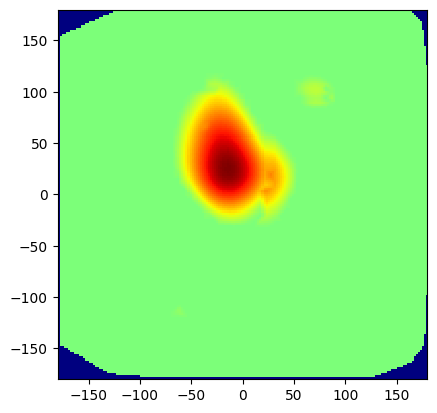

In [497]:
import polars as pl
VMAX = 12

df = pl.DataFrame({"name": names, "energies_min_shift": energies_min_shift * 627, "psi": np.array(phis), "phi": np.array(psis)})
# df = df.filter(pl.col("energies_min_shift") < VMAX)
# df = df.with_columns((pl.col("energies_min_shift").map_elements(lambda x: x if x < VMAX else VMAX)).alias("e_plot"))

from scipy.interpolate import griddata

grid_x, grid_y = np.mgrid[-180:180:2, -180:180:2]

# grid_x, grid_y = np.mgrid[-360:0:1, -360:0:1]

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest', rescale=True)

grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear', rescale=True, fill_value=VMAX)

grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic', rescale=True, fill_value=VMAX)

plt.imshow(grid_z1,  cmap='jet_r', 
           origin='lower', 
           interpolation='nearest',
           extent=(-180, 180, -180, 180),
          )


In [487]:
grid_x

array([[-180, -180, -180, ..., -180, -180, -180],
       [-178, -178, -178, ..., -178, -178, -178],
       [-176, -176, -176, ..., -176, -176, -176],
       ...,
       [ 174,  174,  174, ...,  174,  174,  174],
       [ 176,  176,  176, ...,  176,  176,  176],
       [ 178,  178,  178, ...,  178,  178,  178]], shape=(180, 180))

In [488]:
grid_z0

array([[[6.],
        [6.],
        [6.],
        ...,
        [6.],
        [6.],
        [6.]],

       [[6.],
        [6.],
        [6.],
        ...,
        [6.],
        [6.],
        [6.]],

       [[6.],
        [6.],
        [6.],
        ...,
        [6.],
        [6.],
        [6.]],

       ...,

       [[6.],
        [6.],
        [6.],
        ...,
        [6.],
        [6.],
        [6.]],

       [[6.],
        [6.],
        [6.],
        ...,
        [6.],
        [6.],
        [6.]],

       [[6.],
        [6.],
        [6.],
        ...,
        [6.],
        [6.],
        [6.]]], shape=(180, 180, 1))

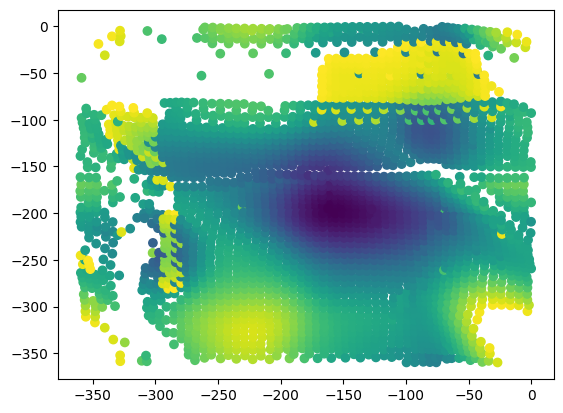

In [489]:
plt.scatter(df["phi"], df["psi"], c=df["energies_min_shift"])

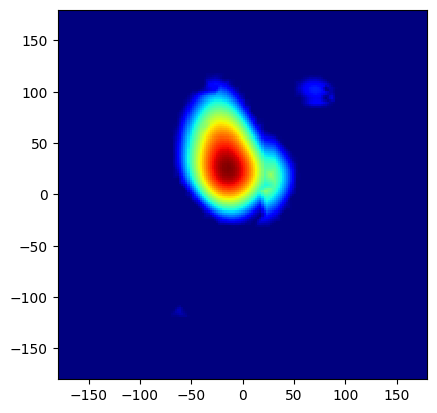

In [493]:
plt.imshow(grid_z1,  cmap='jet_r', 
           origin='lower', 
           interpolation='nearest',
           extent=(-180, 180, -180, 180),
          )

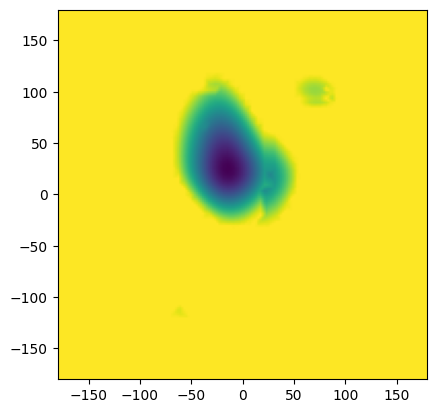

In [495]:
plt.imshow(grid_z1,  cmap='viridis', 
           origin='lower', 
           # interpolation="gaussian",
           extent=(-180, 180, -180, 180),
          )

In [334]:
dir(refiner.refine_triangulation(subdiv=3))
# ref.triangles
refiner.refine_field(z)

(<matplotlib.tri._triangulation.Triangulation at 0x1521d8472e00>,
 masked_array(data=[0.14163337615889304, 8.640164336506869e-19,
                    0.0810812003405772, ..., 4.180349387234401,
                    4.334671055103814, 4.331125360637956],
              mask=[False, False, False, ..., False, False, False],
        fill_value=1e+20))

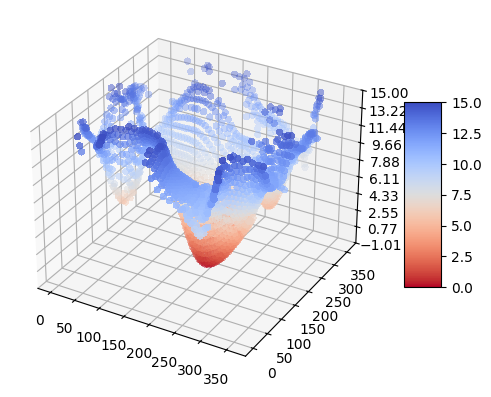

In [186]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Y, Z = df["phi"], df["psi"], df["energies_min_shift"]
# Plot the surface.
surf = ax.scatter(X, Y, Z, cmap=cm.coolwarm_r, c=Z,
                       linewidth=0, antialiased=False, vmin=0, vmax=VMAX)

# Customize the z axis.
ax.set_zlim(-1.01, VMAX)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

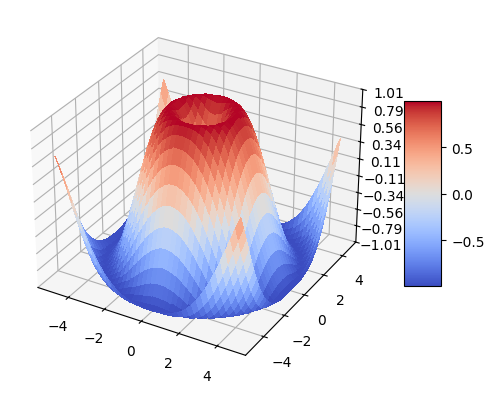

In [119]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [213]:
ndf = df.sort("energies_min_shift")
ndf


name,energies_min_shift,psi,phi
i64,f64,f64,f64
1,0.0,-195.439636,-156.579623
7,0.060712,-195.540076,-150.849716
1350,0.06419,-200.227193,-156.413624
3599,0.072916,-194.920409,-162.163167
2,0.081081,-190.774902,-156.322849
…,…,…,…
1072,11.95727,-334.407089,-136.552582
1826,11.960609,-257.444829,-11.153495
647,11.963748,-199.193449,-5.961614


In [215]:
indexes = []
for i in ndf["name"]:
    indexes.append(i)

len(indexes)

1696

In [227]:
"""
Generates a file "indexes" which holds the 1696 indexes in the above list
"""

# with open("/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/indexes2", "w") as f:
#     for i in indexes:
#         f.writelines(f"{str(i)} ")

In [218]:

for index in indexes:
    opath = f"/cluster/home/schmidtn/master/wahlprak/dftmp2bench/data/xyzs/dih2dscan-{index}.inp.xyz"
    gpath = f"/cluster/home/schmidtn/master/wahlprak/dftmp2bench/data/xyzs2/dih2dscan-{index}.inp.xyz"
    
    with open(opath, "r") as f:
        content = f.read()
    with open(gpath, "w") as t:    
        t.write(content)